In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
def read_eye_tracking_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    eye_tracking_data = []

    for line in lines:
        data = json.loads(line)
        eye_tracking_data.append(data)

    return eye_tracking_data

def parse_data(eye_tracking_data):
    # Grouping data by 'gidx' and organizing it 
    grouped_data = {}

    for data in eye_tracking_data:
        gidx = data.get('gidx')

        if gidx is not None:
            if gidx not in grouped_data:
                grouped_data[gidx] = {
                    'ts' :None,
                    'pdl': None,
                    'pdr': None,
                    'gdl': None,
                    'gdr': None,
                    'gp':None,
                    'gp3': None
                }

            # Extracting pupil diameter for left and right eyes
            ts_data = data.get('ts',None)
            grouped_data[gidx]['ts'] = ts_data
            pd_data = data.get('pd', None)
            gd_data = data.get('gd',None)
            gp_data = data.get('gp',None)
            gp3_data = data.get('gp3',None)
            eye = data.get('eye',None)
            if pd_data is not None:
                if eye =='left':
                    grouped_data[gidx]['pdl'] = pd_data
                elif eye =='right':
                    grouped_data[gidx]['pdr'] = pd_data 

            if gd_data is not None:
                if eye =='left':
                    grouped_data[gidx]['gdl'] = gd_data
                elif eye =='right':
                    grouped_data[gidx]['gdr'] = gd_data
            if gp_data is not None:
                grouped_data[gidx]['gp'] = gp_data
            if gp3_data is not None:
                grouped_data[gidx]['gp3'] = gp3_data
    return grouped_data

def print_data(grouped_data):
    for gidx, data_dict in grouped_data.items():
        print(f"Group with gidx={gidx}:")
        print(f"  pdl: {data_dict['pdl']}")
        print(f"  pdr: {data_dict['pdr']}")
        print(f"  gdl: {data_dict['gdl']}")
        print(f"  gdl: {data_dict['gdl']}")
        print(f"  gp: {data_dict['gp']}")
        print(f"  gp3: {data_dict['gp3']}")
        print("\n")

In [4]:
file_path = 'livedata.json'
eye_tracking_data = read_eye_tracking_data(file_path)
grouped_data = parse_data(eye_tracking_data)
#print_data(grouped_data)

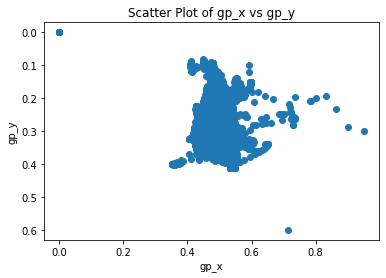

In [5]:
# Extracting data for plotting
gp_values = [[data_dict['gp'][0] for data_dict in grouped_data.values()],
              [data_dict['gp'][1] for data_dict in grouped_data.values()]]

# Plotting
plt.scatter(gp_values[0], gp_values[1])
plt.gca().invert_yaxis()
plt.xlabel('gp_x')
plt.ylabel('gp_y')
plt.title('Scatter Plot of gp_x vs gp_y')
plt.show()